<div>
  <img style="float: left;"  width="140" src=" 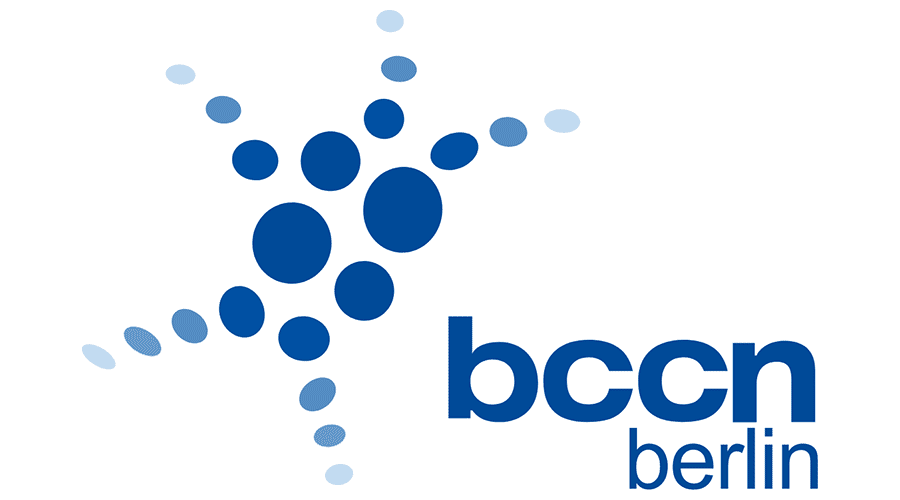">
</div>
 
<h1 id="course-title-heading">
    <div style="text-align: right">
        Models of Higher Brain Functions
        <br>Computer Course
        <br>
    </div>
</h1>
    
---
<div style="text-align: left; float: left">
    Lecturer: Prof. Dr. Henning Sprekeler
</div>

<div style="text-align: right">
    Assistant: Felix Lundt
    <br>(lundt@tu-berlin.de)
</div>



## General exercise instructions
These exercises should be completed entirely in this Jupyter Notebook (comprising source code, discussion and interpretation). Submission should be done through the Moodle interface and should consist only of this notebook (**a single `.ipynb` file**). This Jupyter Notebook was provided inside a `.zip` file, alongside additional files. Do not change the relative paths of these files when working on the assignment (meaning that e.g. `./helper.py` should always be in the same directory as this notebook).

Submission deadline is the start of the next lectue (**10:15 am on Fridays**).

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Some of the exercises will be automatically graded. Make sure that you:
1. Fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"
2. Remove all `raise NotImplementedError` lines once you inserted your solution
3. Don't use variable names starting with underscore (e.g. `_myvar`) in your code, which could interfere with the automatic grading system.

Before you start, please fill in below your names and the name of your group as shown on Moodle. Example:
```
NAMES = ["Martina Musterfrau", "John Smith"]
GROUP = "A"
```

If you have any questions about the exercises, please ask them **on the Moodle forum** of the course.

In [1]:
NAMES = ["Liam Fogarty", "Ghadi El Hasbani"]
GROUP = "G"

In [2]:
# These are a few tests to make sure that your installed Python software is not too old
import sys
assert sys.version_info.major >= 3, "Your Python version is too old, please update it."

import IPython
assert IPython.version_info[0] >= 3, "Your IPython version is too old, please update it."

---

# Week 5: Decision Making I

In [3]:
# Necessary imports for this exercise, you can't modify these
import numpy as np
import matplotlib.pyplot as plt

# Import functions defined in the ./helpers.py file
from helpers import assert_var_defined

In [5]:
# You can add your additional package imports here
import helpers

# Create plots inline in the Jupyter notebook
%matplotlib inline

## Exercise 1 : Extended drift-diffusion model

In this exercise we will explore the reaction time distribution of the drift diffusion model for perceptual decision making.

### 1.1 Implement a simple form of the drift diffusion model (2 points)

Use the Euler-Maruyama method to implement the stochastic differential equation

$$
dX = \mu dt + \sigma dW
$$

which is a simple form of the drift diffusion model. Start with X = 0. Choose $\sigma$ = 0.5, $\mu$ = 0.2. 
Run five simulations of 10 seconds length with $\Delta t$ = 0.01s and plot the results. You can use your `euler_maruyama` implementation from the last exercise sheet or use the version provided in `helpers.py`.

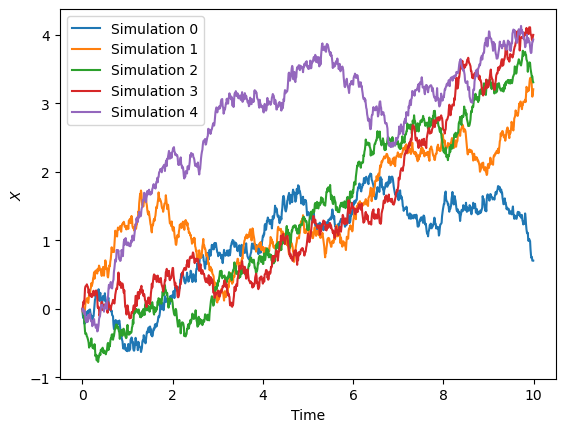

In [8]:
X0 = [0]
mu = 0.2
sigma = 0.5
dt = 0.01
t = np.arange(0, 10, dt)
num_simulations = 5

for i in range(num_simulations):
    X = helpers.euler_maruyama(ffun=lambda t, y: mu, gfun=lambda t, y: sigma, y0=X0, t=t)
    plt.plot(t, X, label=f'Simulation {i}')

plt.xlabel('Time')
plt.ylabel('$X$')
plt.legend()
plt.show()


### 1.2 Simulate decision making with the drift diffusion model
We will use this drift diffusion model as a model for decision making, for which we will define decision boundaries $\pm a$, at which decisions are made.

#### 1.2 a) Implement different decision boundaries (4 points)

- For the drift diffusion model from exercise 1.1, plot the percentage of "up" ($X=+a$) responses as a function of the drift $\mu$ by simulating 200 trials for $a$ = 1 and the following $\mu$ values: −0.1, 0, 0.1, 0.2, 0.5.
- Resimulate trials in which no decision boundary is reached during the simulation.
- Double and halve the value of $a$ and plot the resulting percentage of "up" responses into the same figure. You should have 3 lines, one for each $a$-value.

<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
/var/folders/t1/z7nmnskn4v537qrczglldtzm0000gn/T/ipykernel_11470/3845185583.py:23: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$\mu$')


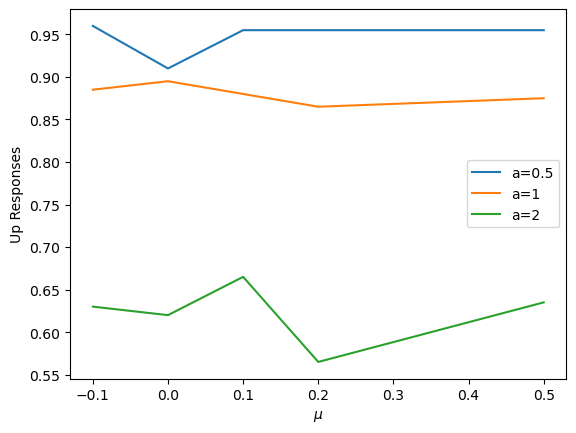

In [11]:
X0 = [0]
mu_vals = [-0.1, 0, 0.1, 0.2, 0.5]
sigma = 0.5
dt = 0.01
t = np.arange(0, 10, dt)
a_vals = [0.5, 1, 2]
num_trials = 200

up_percentages = np.zeros(len(mu_vals))

for a in a_vals: 
    for i in range(len(mu_vals)):
        num_up = 0
        for j in range(num_trials):
            X = helpers.euler_maruyama(ffun=lambda t, y: mu, gfun=lambda t, y: sigma, y0=X0, t=t)
            if np.max(X) >= a:
                num_up += 1
            elif not np.max(X) <= -a:
                j -= 1 # resimulate if no boundary reached
        up_percentages[i] = num_up/num_trials
    plt.plot(mu_vals, up_percentages, label=f'a={a}')

plt.xlabel('$\mu$')
plt.ylabel('Up Responses')
plt.legend()
plt.show()

#### 1.2 b) Discuss your results (2 points)
What happens to the curve if you double, what if you halve the value of $a$? Explain why that is the case in terms of the drift diffusion model.

Doubling the value of $a$ leads to lower proportions of up responses, which can be explained by the fact that setting a higher threshold for the decision boundary reduces the probability that the log likelihood will cross the threshold within a given time window. In the same vein, halving the value of $a$ leads to a lower decision threshold and increases the probability of exceeding this value, which is reflected above by the higher proportions of up responses.

### 1.3 Compute the reaction times (2 points)

Use the results from the last exercise to pick a value of $\mu$ (with $\sigma$ = 0.5) for which about 70% of the trials result in an `up` response. 
Run 2000 trials and record the reaction times, i.e. the moment when the decision variable $X$ crosses one of the
two decision thresholds at $X = \pm a$ (for $a = 1$), as well as the choice, i.e. which of the boundaries was hit.

In [14]:
X0 = [0]
mu = 0.1
sigma = 0.5
num_trials = 2000
a = 1
dt = 0.01
t = np.arange(0, 10, dt)
up_reaction_times = []
down_reaction_times = []

for i in range(num_trials):
    X = helpers.euler_maruyama(ffun=lambda t, y: mu, gfun=lambda t, y: sigma, y0=X0, t=t)
    for j in range(len(X)):
        if X[j] >= a:
            up_reaction_times.append(j)
        elif X[j] <=-a:
            down_reaction_times.append(j)
    # if not np.max(X) >= a or np.max(X) <= -a:
    #     i -= 1 # resimulate if no boundary reached

### 1.4 Study the reaction time distributions

#### 1.4 a) Plot the reaction time distributions (3 points)

Plot a histogram of the reaction times for each of the choices separately, and compare the distributions (hint: use the same axis ranges for better comparability). Calculate their individual mean reaction times and indicate them in the histograms.

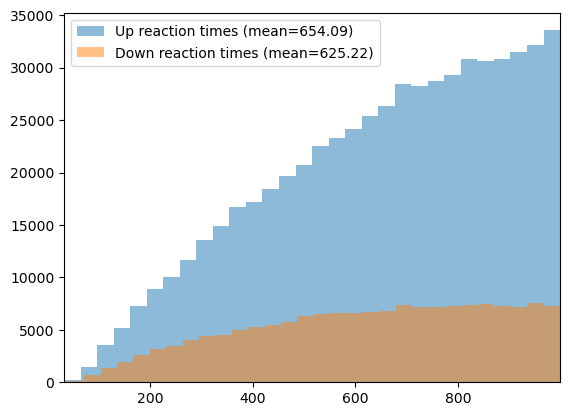

In [16]:
# Plot histograms
plt.hist(up_reaction_times, bins=30, alpha=0.5, label=f'Up reaction times (mean={np.mean(up_reaction_times):.2f})')
plt.hist(down_reaction_times, bins=30, alpha=0.5, label=f'Down reaction times (mean={np.mean(down_reaction_times):.2f})')

# Set axis ranges for comparability
plt.xlim(min(min(up_reaction_times), min(down_reaction_times)), max(max(up_reaction_times), max(down_reaction_times)))
# plt.ylim(0, max(np.histogram(up_reaction_times, bins=30)[0].max(), np.histogram(down_reaction_times, bins=30)[0].max()))

# Add legend
plt.legend()

plt.show()


#### 1.4 b) Discuss your results (2 points)

Discuss whether (and why) this is what you would have expected.

This is what would be expected given that the selected $mu$ value was positive, which is reflected in the above histograms by the overall greater frequency of up respon

### 1.5 Extend the drift diffusion model to better fit experimental data

In behavioral experiments error trials typically show longer reaction times than correct trials. 

#### 1.5 a) Implement an extended version of the drift diffusion model (3 points)

To reproduce these results, implement an extended version of the drift-diffusion model, in which the drift $\mu$ for each trial is drawn from a Gaussian distribution with mean $m_{\mu}$ and standard deviation $s_{\mu}$ . 

Find values for $m_{\mu}$ and $s_{\mu}$ that keep 70% `up` rate but have reaction time distributions that (qualitatively) fit the experimental results better.

Plot your resulting distributions and mean reaction times for `up` and `down` responses from 2000 trials.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### 1.5 b) Discuss your results (2 points)
Why does the extended verion of the drift-diffusion model produce this assymetry in the reaction time distributions?

YOUR ANSWER HERE